In [1]:
import pandas as pd
import pandas_datareader as web
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from pandas_datareader._utils import RemoteDataError
import requests.exceptions as req
import math 
import matplotlib.mlab as mlab


style.use('ggplot')

def readstore():
    start = dt.datetime(2015, 1, 3)
    end = dt.datetime(2017, 12, 6)
    prices = web.DataReader('BTC-USD', 'yahoo', start, end)[['Open','Close']]  # give option for EUR, INR
    return prices

data_loaded=False
while not data_loaded:
    try:
        prices=readstore()
        data_loaded=True
    except RemoteDataError as e:
        print("There was some error downloading data from the server. Trying again......")
    except req.ConnectionError as e:
        print("Unable to download BITCOIN Dataset due to internect connectivity issues: ", e)
        break


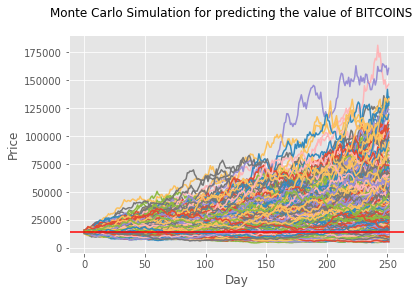

In [2]:
if data_loaded==True:
    days=252 #Number of working days in a year
    returns=np.log(prices['Close']/prices['Open'])    
    daily_volatility = np.std(returns)
    annual_volatility = daily_volatility*((days)**(1/2))
    daily_drift  = np.average(returns)
    annual_drift = daily_drift*365
    mean_drift = daily_drift-0.5*daily_volatility**2
   
    num_simulations=1000  #Number of simulations
   
    sim_df=pd.DataFrame()
    scores = []

    for x in range(num_simulations):
        count=0
        price_series=[]
        last_price=prices['Close'][-1]
        score = last_price*math.e**((annual_drift-0.5*annual_volatility**2)+annual_volatility*np.random.normal(0,1))
        scores.append(score)
        for y in range(days):
            if count==252:
                break
            log_return = mean_drift+(daily_volatility*np.random.normal(0,1))
            price = last_price*(math.e**log_return)
            price_series.append(price)
            last_price=price
            count+=1

        sim_df[x]=price_series

    fig=plt.figure()
    fig.suptitle('Monte Carlo Simulation for predicting the value of BITCOINS')
    plt.plot(sim_df)
    plt.axhline(y=prices['Close'][-1], color='r',linestyle='-')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.show()


In [3]:
print("Avg:"+str(np.average(scores)))
print("Median:"+str(np.median(scores)))
print("Standard Deviation:"+str(np.std(scores)))
print("Min:"+str(np.min(scores)))
print("Max:"+str(np.max(scores)))

Avg:51937.5024607
Median:42409.9713354
Standard Deviation:35478.5361541
Min:6126.21334219
Max:289375.522377


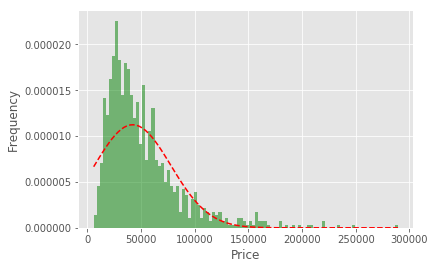

In [4]:
n, bins, patches = plt.hist(scores,100, normed=1, facecolor='green', alpha=0.5)
# Adding a 'best fit' line
y = mlab.normpdf(bins,np.median(scores), np.std(scores))
plt.plot(bins, y, 'r--')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()